# SYDE556/750 Assignment 4: Nengo and Dynamics

- Due Date: March 13th (midnight)
- Total marks: 10 (10% of final grade)
- Late penalty: 1 mark per day

- For this assignment, you must use Nengo, which can be downloaded from http://github.com/nengo/nengo.  Instructions for installing are [here](https://github.com/nengo/nengo/blob/master/README.rst).
    - Feel free to look through the examples folder before doing this assignment.
- You can also use Nengo GUI if you'd like: https://github.com/nengo/nengo_gui

## 1) Building an ensemble of neurons

Make a new model and inside that model make an ensemble of neurons.  It should have 100 neurons, and represent a 1-dimensional space.  The intercepts should be between -1 and 1, and the maximum firing rates should be between 100Hz and 200Hz.  $\tau_{RC}$ should be 0.02s and $\tau_{ref}$ should be 0.002s.

Note: You don't need to run the model over time for this question.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the tuning curves. Plot the representation accuracy plot ($x$ and $\hat{x}$ on the same plot).  Compute and report the RMSE.</li>
<li>[1 mark] What happens to the RMSE as the radius increases?  Why?  Provide four example points (i.e., RMSE at various radiuses).  (Note: Nengo will automatically rescale the intercepts as the radius increases.)</li>
<li>[0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{ref}$ changes between 1-5ms? Show plots.  Why?</li>
<li>[0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{RC}$ changes between 10-100ms? Show plots. Why?</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.0031927394143407327


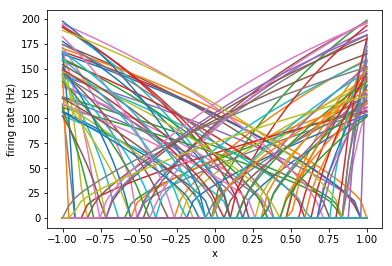

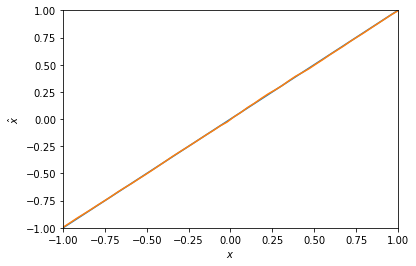

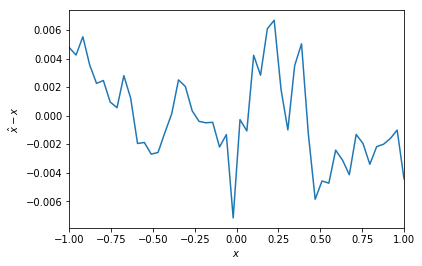

In [2]:
N = 100

model=nengo.Network('Building an ensemble of neurons')

with model:
    #the default value tau_rc = 0.02 & tau_ref = .002
    ens=nengo.Ensemble(100,dimensions=1,
                       intercepts=Uniform(-1,1),
                       max_rates=Uniform(100,200),
                       neuron_type=nengo.LIF() )
    
    connection=nengo.Connection(ens,ens)

sim=nengo.Simulator(model)

d = sim.data[connection].weights.T

x, A = tuning_curves(ens, sim)

xhat = np.dot(A, d)


plt.plot(x, A)
plt.xlabel('x')
plt.ylabel('firing rate (Hz)')

plt.figure()
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.figure()
plt.plot(x, xhat-x)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')
plt.xlim(-1, 1)

print('RMSE', np.sqrt(np.average((x-xhat)**2)))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with radius=1: 0.0039501338588999995 
RMSE with radius=2: 0.010111529276450983 
RMSE with radius=3: 0.010797618651019407 
RMSE with radius=4: 0.020191995634809567 


Text(0, 0.5, 'RMSE')

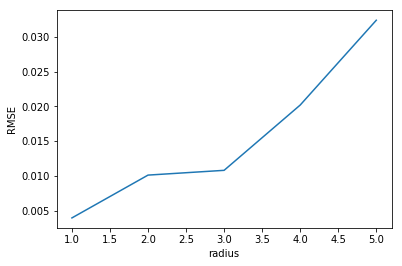

In [3]:
radius=np.array([1,2,3,4,5])
RMSE=np.zeros(radius.size)

for i in range(radius.size):

    ens.radius=radius[i]

    sim=nengo.Simulator(model)

    d = sim.data[connection].weights.T

    x, A = tuning_curves(ens, sim)
    
    xhat = np.dot(A, d)
    
    RMSE[i]=np.sqrt(np.average((x-xhat)**2))

for i in range(4):
    print(f'RMSE with radius={radius[i]}: {RMSE[i]} ')

plt.figure()
plt.plot(radius,RMSE)
plt.xlabel('radius')
plt.ylabel('RMSE')


### Analysis 1.b
As the radius increase, the RMSE will increase. 
Because we use the same number of neurons but we have to distribute them in a wider range. 
So for wider range we have fewer number of neurons to estimate a specific x value.
For the sake of comparison the tuning curves for radius=5 are also drawn to show the lower density of the tuning curves in the wider range

Text(0, 0.5, 'firing rate (Hz)')

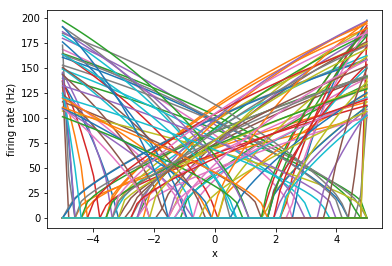

In [4]:
###part f Analysis 1.b
plt.plot(x, A)
plt.xlabel('x')
plt.ylabel('firing rate (Hz)')

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with tau_ref=0.001: 0.0050025474022828914 
RMSE with tau_ref=0.002: 0.0039023490282476944 
RMSE with tau_ref=0.003: 0.004390819617837648 
RMSE with tau_ref=0.004: 0.00539186862266844 
RMSE with tau_ref=0.005: 0.008983081268740742 


Text(0, 0.5, 'RMSE')

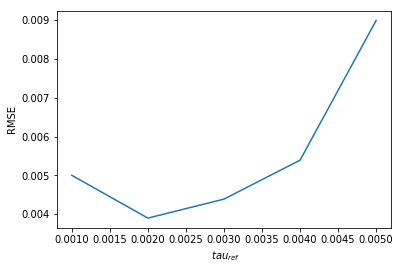

In [5]:
#Reseting Radius to r=1
ens.radius=1

tau_ref = np.array([.001,.002,.003,.004,.005])

RMSE=np.zeros(tau_ref.size)

for i in range(tau_ref.size):
    
    ens.neuron_type = nengo.LIF(tau_ref=tau_ref[i])
        
    sim=nengo.Simulator(model)

    d = sim.data[connection].weights.T

    x, A = tuning_curves(ens, sim)
 
    xhat = np.dot(A, d)
    
    RMSE[i]=np.sqrt(np.average((x-xhat)**2))

for i in range(tau_ref.size):
    print(f'RMSE with tau_ref={tau_ref[i]}: {RMSE[i]} ')

plt.figure()   
plt.plot(tau_ref,RMSE)
plt.xlabel('$\ tau_{ref}$')
plt.ylabel('RMSE')

### Analysis 1.c
It has not consistent trend. But the general trend is increasing.
If we look at spiking nurons, they generate less spikes for a given value of x as tau_ref increases. 
Since during tau_ref period the neuron voltage is zero.
In addition, we can say tuning curves get flatter as tau_ref increases.
And intutively flatter tuning curves work better for representing lower frequency signals, and do not properly estimate signals with high frequency content.The tuning curves becomming flatter is shown in the following graph.

Text(0, 0.5, 'firing rate (Hz)')

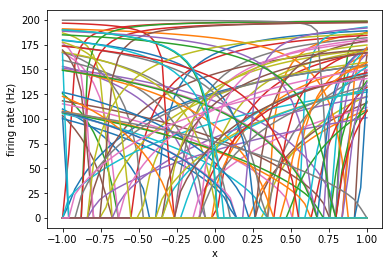

In [6]:
#part of analysis 1.c
plt.plot(x, A)
plt.xlabel('x')
plt.ylabel('firing rate (Hz)')

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE with tau_ref=0.01: 0.004820285007247387 
RMSE with tau_ref=0.02: 0.006603825385453611 
RMSE with tau_ref=0.03: 0.0043278083901056 
RMSE with tau_ref=0.04: 0.0035336910226236172 
RMSE with tau_ref=0.05: 0.004268941186759934 
RMSE with tau_ref=0.06: 0.0042794963576713255 
RMSE with tau_ref=0.07: 0.004906404245905926 
RMSE with tau_ref=0.08: 0.004503150007829947 
RMSE with tau_ref=0.09: 0.00597411835663999 
RMSE with tau_ref=0.1: 0.0034530374366115385 


Text(0, 0.5, 'RMSE')

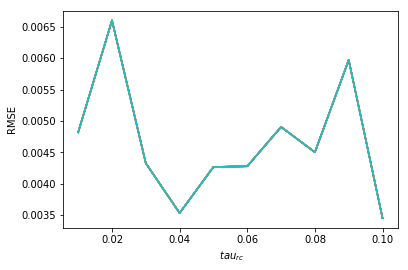

In [7]:
#resetting the tau_ref to default
ens.neuron_type = nengo.LIF()

tau_rc = np.array([.01,.02,.03,.04,.05,.06,.07,.08,.09,.1])

RMSE=np.zeros(tau_rc.size)

for i in range(tau_rc.size):

    ens.neuron_type = nengo.LIF(tau_rc=tau_rc[i])                      

    sim=nengo.Simulator(model)

    d = sim.data[connection].weights.T

    x, A = tuning_curves(ens, sim)
 
    xhat = np.dot(A, d)
    
    RMSE[i]=np.sqrt(np.average((x-xhat)**2))

for i in range(tau_rc.size):
    print(f'RMSE with tau_ref={tau_rc[i]}: {RMSE[i]} ')

    plt.plot(tau_rc,RMSE)
plt.xlabel('$\ tau_{rc}$')
plt.ylabel('RMSE')

### Analysis 1.d
It has not consistent trend. 
From the perspictive of spiking neurons, 
the same alaysis holds like the previous one stated for tau_ref.
If we look at spiking nurons they generate less spikes for a given input as tau_rc increases. 
Since it takes more time for their voltage to reach action potential. 

## 2) Connecting neurons

Make a second ensemble of spiking neurons.  It should have the same parameters as the first ensemble of neurons (from the first question), but have only 50 neurons in it.  Connect the first ensemble to the second such that it computes the identity function, using a post-synaptic time constant of 0.01.  Create an input that is a value of 1 for 0.1<t<0.4 seconds, and otherwise is zero (you can use a lambda function).

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Show the input value and the decoded values from the two ensembles in three separate plots.  Run the simulation for 0.5 seconds.</li>
<li>[1 mark] Make a new version of the model where instead of computing the identity function, it computes `y=1-2*x`.  Show the same graphs as in part (a).</li>
</ol>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

(0, 1)

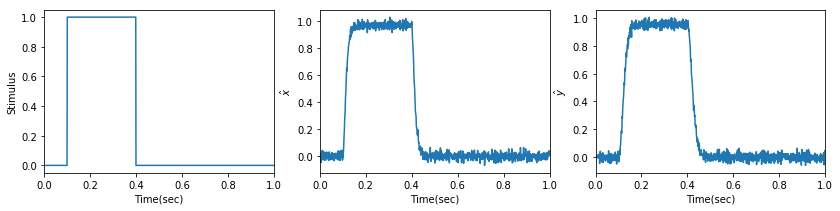

In [55]:
T=1

model=nengo.Network(label="Connecting neurons")

with model:
 
    stim = nengo.Node(lambda t:1 if (0.1<t<0.4) else 0)
    
    ensA=nengo.Ensemble(50,dimensions=1,neuron_type=nengo.LIF())
    ensB=nengo.Ensemble(50,dimensions=1,neuron_type=nengo.LIF())
    
    nengo.Connection(stim,ensA)
    conn=nengo.Connection(ensA,ensB,synapse=0.01)
    
    stim_p=nengo.Probe(stim)
    ensA_p=nengo.Probe(ensA,synapse=0.01)
    ensB_p=nengo.Probe(ensB,synapse=0.01)
    
sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

plt.figure (figsize=(14,3))
plt.subplot(1,3,1)
plt.plot(t,sim.data[stim_p])
plt.xlabel('Time(sec)')
plt.ylabel('Stimulus')
plt.xlim(0,T)

plt.subplot(1,3,2)
plt.plot(t,sim.data[ensA_p])
plt.xlabel('Time(sec)')
plt.ylabel('$\hat{x}$')
plt.xlim(0,T)

plt.subplot(1,3,3)
plt.plot(t,sim.data[ensB_p])
plt.xlabel('Time(sec)')
plt.ylabel('$\hat{y}$')
plt.xlim(0,T)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

(0, 1)

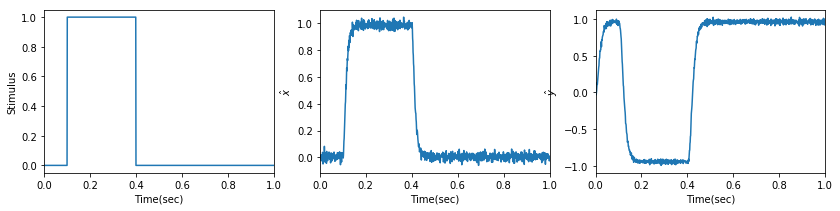

In [56]:
conn.function=lambda x:1-2*x
    
sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

plt.figure (figsize=(14,3))
plt.subplot(1,3,1)
plt.plot(t,sim.data[stim_p])
plt.xlabel('Time(sec)')
plt.ylabel('Stimulus')
plt.xlim(0,T)

plt.subplot(1,3,2)
plt.plot(t,sim.data[ensA_p])
plt.xlabel('Time(sec)')
plt.ylabel('$\hat{x}$')
plt.xlim(0,T)

plt.subplot(1,3,3)
plt.plot(t,sim.data[ensB_p])
plt.xlabel('Time(sec)')
plt.ylabel('$\hat{y}$')
plt.xlim(0,T)

## 3) Dynamics

Build a neural integrator.  This consists of one ensemble, one input, a connection from the input to the ensemble, and a connection from the ensemble back to itself.  The ensemble should have 200 neurons and the same parameters as in question 1.  The post-synaptic time constant of the recurrent connection is 0.05, and the post-synaptic time constant of the input is 0.005.  

To be an integrator, the desired dynamical system is ${{dx} \over {dt}} = u$.  To implement this with the NEF, we use the transformation discussed in class, so the feedback connection should compute $f'(x)=x$ and the input connection should compute $g'(x)=\tau u$, where $u$ is the input and $\tau$ is the post-synaptic time constant of the *feedback* connection.  So the feedback connection should compute the identity function and the input connection should compute 0.05 times the input.

For all probes, use a synapse of 0.01.  Explicitly plot the ideal, which can help when answering the questions.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Show the input and the value represented by the ensemble when the input is a value of 0.9 from t=0.04 to t=1.0 (and 0 for other times).  Run the simulation for 1.5 seconds.  What is the expected ideal result (i.e. if we just mathematically computed the integral of the input, what would we get?)  How does the simulated output compare to that ideal?</li>
<li>[1 mark] Change the neural simulation to rate mode (use `model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()` which will change all neurons in the simulation to LIF rate neurons).  Re-run the simulation in rate mode.  Show the resulting plots.  How does this compare to the result in part (a)?</li>
<li>[1 mark] Returning to spiking mode, change the input to be a value of 0.9 from t=0.04 to 0.16.  Show the same plots as before (the input and the value represented by the ensemble over 1.5 seconds).  How does this compare to (a)?  Why is it better or worse?</li>
<li>[1 mark] Change the input to a ramp input from 0 to 0.9 from t=0 to t=0.45 (and 0 for t>0.45). Show the same plots as in the previous parts of this question.  What does the ensemble end up representing, and why?  What is the (ideal) equation for the curve traced out by the ensemble?</li>
<li>[1 mark] Change the input to `5*sin(5*t)`.  What should the value represented by the ensemble be (write the equation)?  How well does it do?  What are the differences between the model's behaviour and the expected ideal behaviour?</li>
<li>[Bonus, up to 1 mark] Implement a nonlinear dynamical system we have not seen in class, and demonstrate that it's working as expected.
</ol>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.4226908816126909


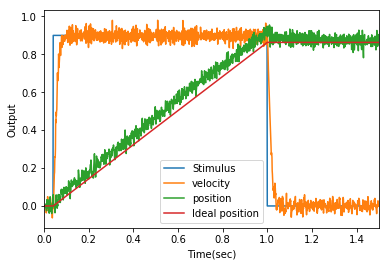

In [57]:
#==================
#Answer to 3.a
#==================
T=1.5
tau=0.05

model=nengo.Network('Dynamics',seed=3)

with model:
  
    stim= nengo.Node(lambda t:0.9 if (0.04<t<1) else 0)
    
    velocity=nengo.Ensemble(200,dimensions=1,
                            intercepts=Uniform(-1,1),
                            max_rates=Uniform(100,200),
                            neuron_type=nengo.LIF())
    
    position=nengo.Ensemble(200,dimensions=1,
                            intercepts=Uniform(-1,1),
                            max_rates=Uniform(100,200),
                            neuron_type=nengo.LIF())
    def feedback(x):
        return 1*x
    
    nengo.Connection(stim, velocity)
    nengo.Connection(velocity, position, transform=tau, synapse=0.005)
    nengo.Connection(position, position, function=feedback, synapse=tau)
    
    stim_p=nengo.Probe(stim)
    velocity_p=nengo.Probe(velocity,synapse=0.01)
    position_p=nengo.Probe(position, synapse=0.01)

sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

#============================================================
#mathematically computing the integral of the input

positionIdeal=np.zeros(t.size)
i=1 
while i<t.size:
    positionIdeal[i]= positionIdeal[i-1]+sim.data[stim_p][i-1]*0.001
    i+=1
#============================================================

plt.figure ()
plt.plot(t,sim.data[stim_p])
plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

print('RMSE', np.sqrt(np.average((positionIdeal-sim.data[position_p])**2)))

### Analysis 3.a
There are some differences between ideal and simulated output. 

1- The simulated signals are super noisy because they are generated from spiking neurons.

2- Due to dynamics introcuced by Post Synaptic Current filter (h(t)) in the connection between velocity and recurrent position to the position ensemble (velocity->position & position->position), the simulated integral result and ideal one do not concide.

3- After T=1 the integral value in the simulated output start to drift. The reason of this drift is noise. In addition, we feedback $\hat{x}$ in recurrent loop not $x$ so we have distortion error. 

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.41327746470362603


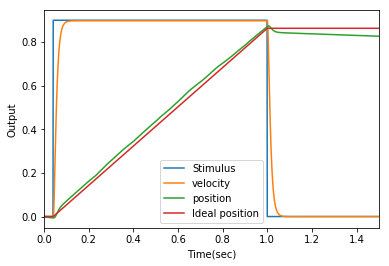

In [58]:
#==================
#Answer to 3.b
#==================

#Run 3.a first
# model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()
velocity.neuron_type = nengo.LIFRate()
position.neuron_type = nengo.LIFRate()

   
sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

plt.figure ()
plt.plot(t,sim.data[stim_p])
plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

print('RMSE', np.sqrt(np.average((positionIdeal-sim.data[position_p])**2)))

### Analysis 3.b

- The signals are totally smooth since they are generated through rate neurons instead of spiking neurons. 

- All three items mentioned (after noise) in analysis 3.a are valid here, as well.


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

RMSE 0.03844694440010991


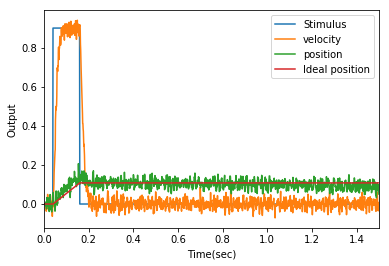

In [59]:
#==================
#Answer to 3.c
#==================
from nengo.utils.functions import piecewise

velocity.neuron_type = nengo.LIF()
position.neuron_type = nengo.LIF()

stim.output=piecewise({.04:.9, .16:0})

sim=nengo.Simulator(model,seed=3)
sim.run(T)

t=sim.trange()

#============================================================
#mathematically computing the integral of the input

positionIdeal=np.zeros(t.size)
i=1 
while i<t.size:
    positionIdeal[i]= positionIdeal[i-1]+sim.data[stim_p][i-1]*0.001
    i+=1
#============================================================


plt.figure ()
plt.plot(t,sim.data[stim_p])
plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

print('RMSE', np.sqrt(np.average((positionIdeal-sim.data[position_p])**2)))

### Analysis 3.c
The drift discussed, is crystal clear in 3.c compared to 3.a. 
The situation is worse. The time iterval that the input is constant is  The integral value changes even when there is not any input due to error in estimating $\hat{x}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

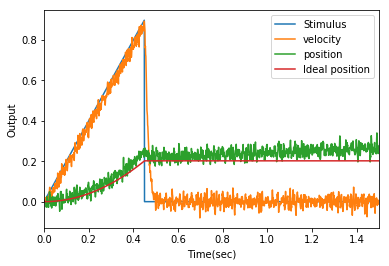

In [13]:
#==================
#Answer to 3.d
#==================
stim.output= lambda t:2*t if (0<t<0.45) else 0

sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

#============================================================
#mathematically computing the integral of the input

positionIdeal=np.zeros(t.size)
i=1 
while i<t.size:
    positionIdeal[i]= positionIdeal[i-1]+sim.data[stim_p][i-1]*0.001
    i+=1
#============================================================


plt.figure ()
plt.plot(t,sim.data[stim_p])
plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

### Analysis 3.d
The ensemble end up representing the integral of the input ramp function  function 2*t for 0<t<.045 after t=0.45 the input returns to constant=0; however the simulated output start to drift due to error between x and $\hat{x}$. The ideal curve (shown in red) is output=$t^{2}$ for (0<t<0.45) and 0.2025 for t>0.45.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

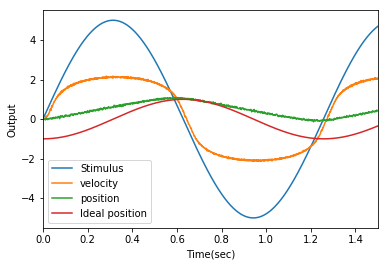

In [14]:
#==================
#Answer to 3.e
#==================
stim.output= lambda t:5*np.sin(5*t) 

sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

#============================================================
#mathematically computing the integral of the input

positionIdeal=np.zeros(t.size)
#initial Condition for V at t=0
k=-1
positionIdeal[0]=k 
i=1
while i<t.size:
    positionIdeal[i]= positionIdeal[i-1]+sim.data[stim_p][i-1]*0.001
    i+=1
#============================================================


plt.figure ()
plt.plot(t,sim.data[stim_p])
plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
#plt.plot(t,-np.cos(5*t))
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

### Analysis 3.e.
The ideal integral of the unput is: -cos(5*$\theta$).
The stimulus is first represented by velocity ensemble. Since the amplitude of the input sin function was high in some points the velocity neurons saturated in these high points. However, this was not required in this assignment. I have used velocity population to write my codes more similar to the codes presented by Prof. Eliasmith in the class. In the code below, I connected the Stimulus signal directly to Position ensemble to study how the neural integrator follows the imput without saturation effect. The ideal integral function starts from -1 but since our neural integrator is needed to represent a real casual system it starts from 0. Nevertheless, after almost a half period it has become able to follow the ideal integral function properly. There is slight difference between ideal and simulated result because of PSC filter integral and using spikeing neurons.   

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

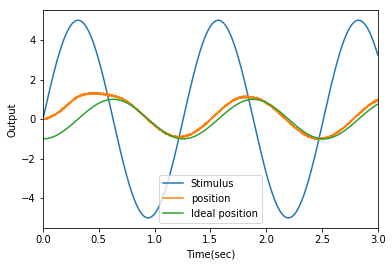

In [16]:
#==================
#Related to Analysis 3.e
#==================
T=3
tau=0.05

model=nengo.Network('Dynamics_Stimulus_Directly_Connected')

with model:
  
    stim= nengo.Node(lambda t:5*np.sin(5*t))
    
    velocity=nengo.Ensemble(200,dimensions=1,
                            intercepts=Uniform(-1,1),
                            max_rates=Uniform(100,200),
                            neuron_type=nengo.LIF())
    
    position=nengo.Ensemble(200,dimensions=1,
                            intercepts=Uniform(-1,1),
                            max_rates=Uniform(100,200),
                            neuron_type=nengo.LIF())
    def feedback(x):
        return 1*x
    
    #nengo.Connection(stim, velocity)
    #nengo.Connection(velocity, position, transform=tau, synapse=0.005)
    #instead of represented velocity the stimulus is directly connected
    nengo.Connection(stim, position, transform=tau, synapse=0.005)
    nengo.Connection(position, position, function=feedback, synapse=tau)
    
    stim_p=nengo.Probe(stim)
    #velocity_p=nengo.Probe(velocity,synapse=0.01)
    position_p=nengo.Probe(position, synapse=0.01)

sim=nengo.Simulator(model)
sim.run(T)

t=sim.trange()

#============================================================
#mathematically computing the integral of the input

positionIdeal=np.zeros(t.size)
positionIdeal[0]=-1
i=1 
while i<t.size:
    positionIdeal[i]= positionIdeal[i-1]+sim.data[stim_p][i-1]*0.001
    i+=1
#============================================================

plt.figure ()
plt.plot(t,sim.data[stim_p])
#plt.plot(t,sim.data[velocity_p])
plt.plot(t,sim.data[position_p])
plt.plot(t,positionIdeal)
plt.xlabel('Time(sec)')
plt.ylabel('Output')
plt.xlim(0,T)
plt.legend(('Stimulus','position','Ideal position'),loc='best')
#plt.legend(('Stimulus','velocity','position','Ideal position'),loc='best')

In [ ]:
#================
#Respose to 3.f.
#==================

The following nonlinear system [Guckenheimer and Holmes ] is implimented for 3.f section. 

$\ddot{x}+ \epsilon x^{2} \dot{x}+x=0$

The state vector is x=[$x_{0}=x,x_{1}=\dot{x}$]

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

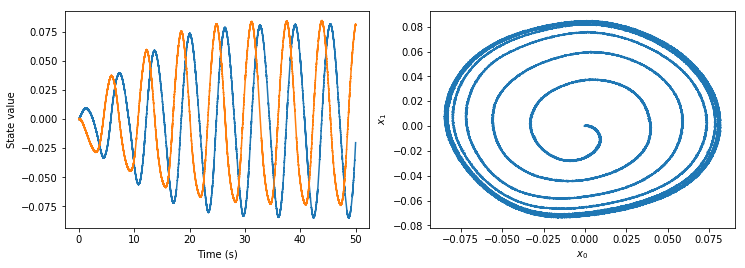

In [21]:
myModel = nengo.Network('Chaotic System')

tau=0.1

epsilon = 20

with myModel:
       
    state = nengo.Ensemble(2000, dimensions=2, radius=0.5)
    
    def feedback(x):
        return [tau*x[1]+x[0], tau*(-x[0]-epsilon*x[0]**2*x[1])+x[1]]
    
    nengo.Connection(state, state, function=feedback, synapse=tau)
    
    state_p = nengo.Probe(state, synapse=tau)
    
sim = nengo.Simulator(myModel)
sim.run(50)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sim.trange(), sim.data[state_p]);
plt.xlabel('Time (s)')
plt.ylabel('State value')
       
plt.subplot(1,2,2)
plt.plot(sim.data[state_p][:,0],sim.data[state_p][:,1])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$');